# <span style="color:blue"> Esercitazione 8 - Neural Network Regression </span>

## <span style="color:blue"> Indice</span>

- [Esercizio 11.1 - Dipendenza regressione lineare dai parametri $N_{\mathrm{epochs}}$, $N_{\mathrm{train}}$ e $\sigma$](#Esercizio11.1)

- [Esercizio 11.2 - Estensione modello per fit del polinomio $f(x)=4-3x-2x^2+3x^3$ for $x \in [-1,1]$](#Esercizio11.2)

- [Esercizio 11.3 - Estensione modello per fit di funzioni tringonometriche](#Esercizio11.3)

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

## <span id="Esercizio11.1" style="color:blue">Esercizio 11.1 - Dipendenza regressione lineare dai parametri $N_{\text{epochs}}$, $N_{\text{train}}$ e $\sigma$ [^](#toc)</span>

### Descrizione

In questo esercizio si affronta un problema di regressione su dati rumorosi utilizzando una rete neurale (Neural Network, NN).
Lo scopo è studiare la capacità del modello di apprendere una relazione funzionale sottostante ai dati e valutare come la scelta dei parametri della rete influenzi sia l’accuratezza del fit sia la qualità delle predizioni su dati nuovi.

Si considera un processo probabilistico che genera coppie di dati $(x,y)$ secondo la relazione

$$
y_i = f(x_i) + \eta_i,
$$

dove $f(x_i)$ è una funzione incognita e $\eta_i$ è variabile casuale non correlata distribuita secondo una distribuzione gaussiana con

$$
\langle \eta_i \rangle = 0 \qquad \langle \eta_i \eta_j \rangle = \delta_{ij}\sigma
$$

Per effettuare previsioni, si utilizza una rete neurale parametrizzata da pesi e bias. 
L’addestramento del modello avviene ottimizzando tali parametri su un insieme di dati di training. Successivamente, le prestazioni vengono valutate su un altro insieme di dati (validation o test set), in modo da verificare la capacità di generalizzazione del modello.

Come misura quantitativa dell’accuratezza si utilizza l’errore quadratico medio (Mean Squared Error, MSE), calcolato sul test set:

$$
MSE = \frac{1}{N_{\text{test}}} \sum_{j=1}^{N_{\text{test}}} (y_j^{\text{pred}} - y_j)^2
$$

Oltre alla valutazione numerica tramite MSE, come analisi qualitativa si effettua un’analisi grafica del confronto tra predizioni e dati reali.

### Calcolo e risultati


Si considera la seguente funzione lineare:

$$
f(x)=2x+1
$$

nel dominio $x \in [-1,1]$ .

Trattandosi di una funzione lineare, è sufficiente utilizzare una rete costituita da un singolo neurone. Infatti, un neurone con input $x$ realizza una trasformazione del tipo $y=wx+b$, dove $w$ e $b$ sono rispettivamente peso e bias, ossia i parametri che il modello deve apprendere durante la fase di addestramento. In questo caso, la rete è quindi formalmente equivalente a un modello lineare.

Verrà analizzato come la qualità del fit e la capacità predittiva dipendano dal numero di epoche, $N_{\mathrm{epochs}}$, dal numero di dati di train, $N_{\mathrm{train}}$, e dal rumore, $\sigma$.

Sono stati utilizzati i valori $N_{\mathrm{valid}} = 50$, $N_{\mathrm{epochs}} = 30$, $N_{\mathrm{train}} = 500$ e $\sigma = 0.2$.

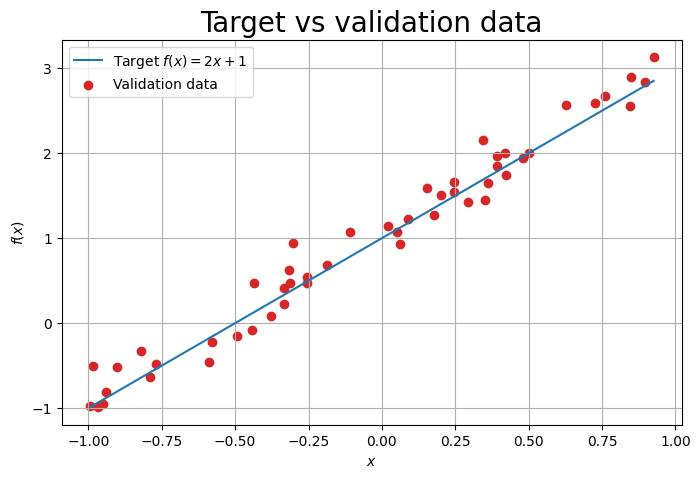

In [23]:
# Target parameters 
m=2 
b=1 

# NN parameters
N_v=50           #Number of validation points
N_e=30           #Number of epochs
N_t=500          #Number of training points 
sigma=0.2        #Standard deviation of noise

np.random.seed(0)
x_t=np.random.uniform(-1,1,N_t)        # Generate training inputs
x_v=np.random.uniform(-1,1,N_v)        # Generate validation inputs
x_v.sort()

y_t=np.random.normal(m*x_t+b,sigma) 
y_v=np.random.normal(m*x_v+b,sigma) 

y_target=m*x_v+b                         # Target linear function

plt.figure(figsize=(8,5))
plt.plot(x_v, y_target, label='Target $f(x) = 2x + 1$')
plt.scatter(x_v, y_v, color='tab:red', label='Validation data')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$f(x)$', fontsize=10)
plt.title('Target vs validation data', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

Il grafico mostra il confronto tra la funzione target teorica e i dati di validazione generati.
Dal grafico quindi si osserva la differenza tra la legge esatta e i dati affetti da rumore che la rete neurale dovrà imparare ad approssimare.

Si procede quindi alla costruzione della rete neurale per il caso lineare considerato.

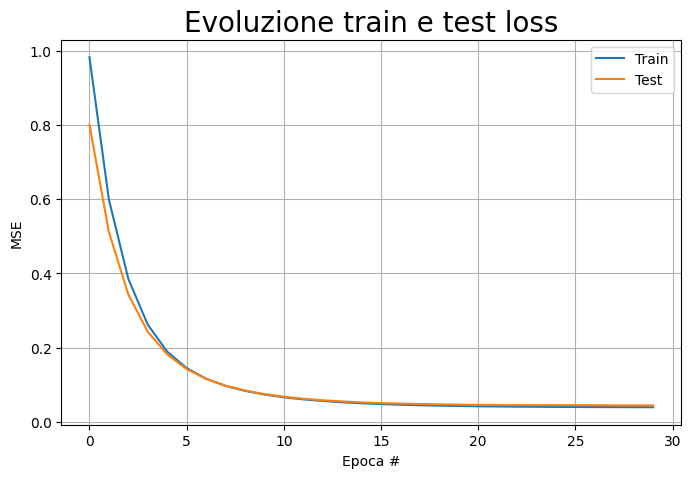

Performance del modello:
Test loss =  0.044485047459602356

Performance del rispetto alla funzione target:
Test loss =  0.0004939694772474468


In [25]:
optimizer='sgd'    
loss_function='mse'    

# Compose the NN model
model=Sequential()
# Input variable x
model.add(Input(shape=(1,)))
# Single output layer with 1 neuron, directly connected to the input
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer=optimizer, loss=loss_function, metrics=['mse'])

# Fit the model using training dataset
history=model.fit(x=x_t, y=y_t, 
        batch_size=32, epochs=N_e,
        shuffle=True, verbose=0, 
        validation_data=(x_v, y_v))

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoca #', fontsize=10)
plt.title('Evoluzione train e test loss', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

print('Performance del modello:')
# Evaluate model
mse=model.evaluate(x_v, y_v, batch_size=32, verbose=0)
print('Test loss = ', mse[0])
print()
# Evaluate model with the exact curve
print('Performance del rispetto alla funzione target:')
mse=model.evaluate(x_v, y_target, batch_size=32, verbose=0)
print('Test loss = ', mse[0])

Il grafico mostra l’andamento della funzione di loss MSE durante l’addestramento, sul training set e sul validation (test) set.  

Nelle prime epoche l’errore risulta elevato, in quanto i parametri della rete $(w,b)$ sono inizializzati casualmente. Con il progredire dell’addestramento, si osserva una rapida diminuzione della loss per entrambi i dataset, fino al raggiungimento di un valore prossimo a zero.

La sovrapposizione delle due curve indica che il modello apprende correttamente la relazione lineare sottostante senza evidenziare fenomeni di overfitting. In particolare, la prossimità tra errore di training ed errore di validazione suggerisce una buona capacità di generalizzazione. 

Dal confronto quantitativo dei valori di loss si osserva che l’errore calcolato sui dati di validazione risulta leggermente superiore rispetto a quello valutato rispetto al target ideale. Tale differenza è coerente con la presenza del rumore nei dati campionati, mentre la bassa loss rispetto alla funzione target conferma che la rete ha appreso correttamente la legge lineare $f(x)=2x+1$.

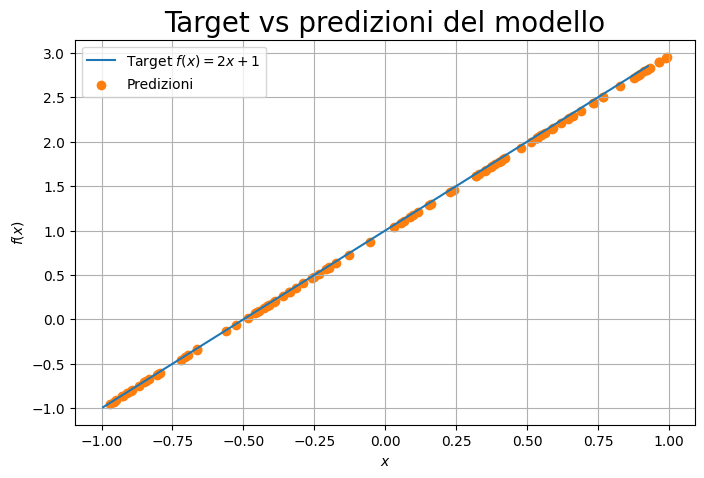

In [26]:
plt.figure(figsize=(8,5))

x_pred=np.random.uniform(-1, 1, 100)
y_pred=model.predict(x_pred, verbose=0)

plt.plot(x_v, y_target, label='Target $f(x) = 2x + 1$')
plt.scatter(x_pred, y_pred, color='tab:orange', label='Predizioni')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$f(x)$', fontsize=10)
plt.title('Target vs predizioni del modello', fontsize=20)
plt.grid(True)
plt.legend()

plt.show()

Il grafico mostra sovrapposizione tra i punti stimati e la retta $f(x)=2x+1$, questo indica che, al termine dell’addestramento, i parametri della rete convergono verso valori prossimi a quelli attesi $w=2$ e $b=1$.

Da questo risultato si evidenzia che una rete neurale costituita da un singolo neurone è sufficiente per rappresentare esattamente una relazione lineare di questo tipo, e che l’algoritmo di ottimizzazione riesce a identificare correttamente i parametri della funzione sottostante.

### Variazione dei parametri

Successivamente sono state eseguite ulteriori simulazioni variando sistematicamente uno dei parametri tra $N_{\mathrm{epochs}}$, $N_{\mathrm{train}}$ e $\sigma$, mantenendo costanti gli altri due.

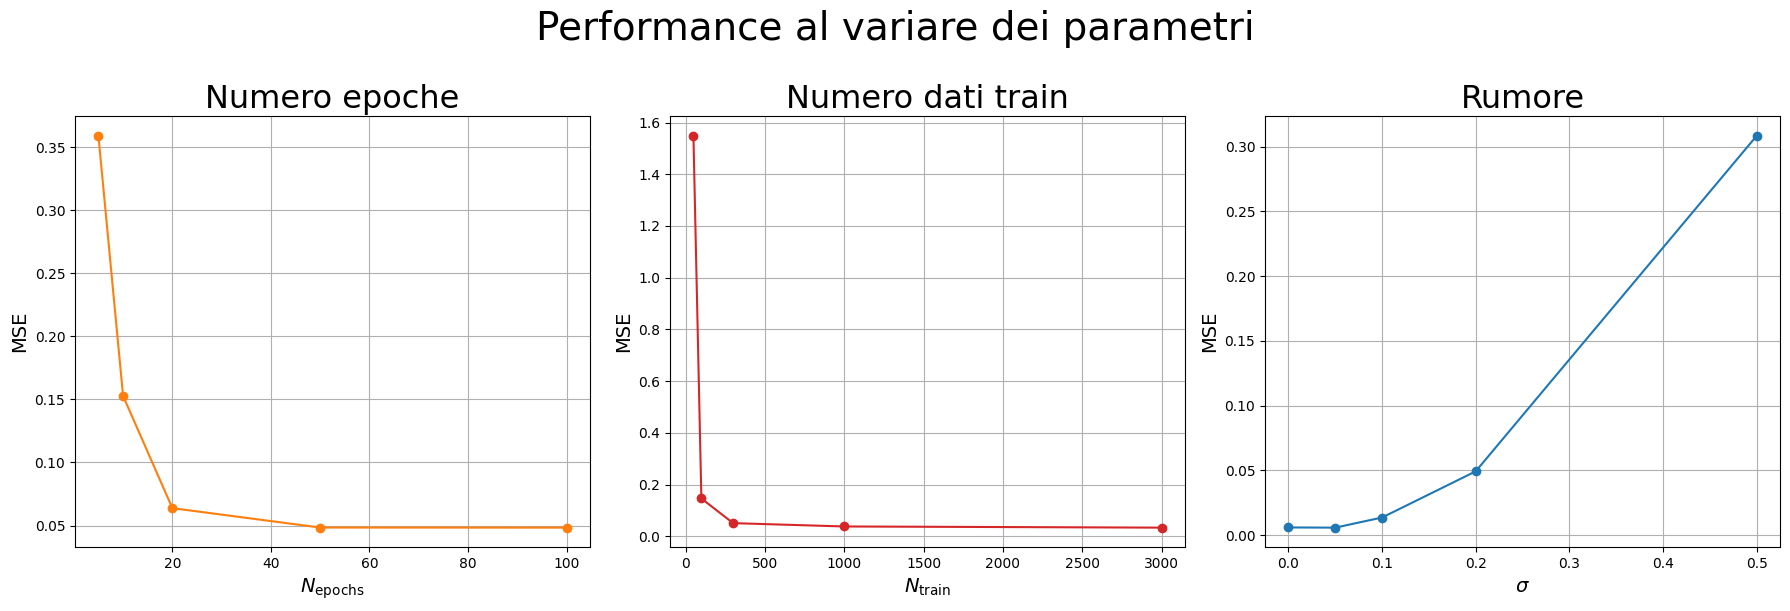

In [27]:
def run(N_epochs, N_train, sigma):
    np.random.seed(0)
    x_train=np.random.uniform(-1, 1, N_train)
    y_train=np.random.normal(m * x_train + b, sigma)
    y_v2=np.random.normal(m * x_v + b, sigma)
    model=Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(1))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    model.fit(x_train, y_train,
              batch_size=32, epochs=N_epochs,
              shuffle=True, verbose=0,
              validation_data=(x_v, y_v2))

    MSE=model.evaluate(x_v, y_v2, verbose=0)[0]
    return MSE

# Lista parametri
N_e_list=[5, 10, 20, 50, 100]
N_t_list=[50, 100, 300, 1000, 3000]
sigma_list=[0.0, 0.05, 0.1, 0.2, 0.5]

MSE_N_e=[run(ne, 500, 0.2) for ne in N_e_list]
MSE_N_t=[run(30, nt, 0.2) for nt in N_t_list]
MSE_sigma=[run(30, 500, sg) for sg in sigma_list]

fig, axs=plt.subplots(1,3,figsize=(18, 6))
fig.suptitle('Performance al variare dei parametri', fontsize=28, y=1.01)

# Epoche
axs[0].plot(N_e_list, MSE_N_e, 'o-', color='tab:orange')
axs[0].set_xlabel('$N_{\mathrm{epochs}}$', fontsize=14)
axs[0].set_ylabel('MSE', fontsize=14)
axs[0].set_title('Numero epoche', fontsize=23)
axs[0].grid(True)

# Dati train
axs[1].plot(N_t_list, MSE_N_t, 'o-', color='tab:red')
axs[1].set_xlabel('$N_{\mathrm{train}}$', fontsize=14)
axs[1].set_ylabel('MSE', fontsize=14)
axs[1].set_title('Numero dati train', fontsize=23)
axs[1].grid(True)

# Rumore
axs[2].plot(sigma_list, MSE_sigma, 'o-', color='tab:blue')
axs[2].set_xlabel('$\sigma$', fontsize=14)
axs[2].set_ylabel('MSE', fontsize=14)
axs[2].set_title('Rumore', fontsize=23)            
axs[2].grid(True)
            
plt.tight_layout()
plt.show()

Si può osservare innanzitutto che un numero insufficiente di epoche non consente la convergenza. La loss si stabilizza oltre $\approx 50$ epoche.

Inoltre:
- un training set troppo piccolo comporta scarsa generalizzazione e test loss elevata;
- l’aumento del rumore $\sigma$ nei dati porta ad una loss più alta mentre se $\sigma = 0$ la rete può apprendere esattamente la legge target. 

## <span id="Esercizio11.2" style="color:blue">Esercizio 11.2 – Estensione modello per fit del polinomio $f(x)=4-3x-2x^2+3x^3$, $x \in [-1,1]$</span>

### Descrizione

In questo esercizio viene esteso il modello precedente per ottenere un fit, nel dominio $x \in [-1,1]$, del seguente polinomio di terzo grado:
$$f(x)=4-3x-2x^2+3x^3$$

Sarà quindi necessario scegliere adeguatamente numero di layer, numero di neuroni in ciascun layer, funzione di attivazione, ottimizzatore e funzione di loss.

### Calcolo e risultati

Verrà eseguita la stessa analisi svolta in precedenza, con $N_{\mathrm{valid}}=200$, $N_{\mathrm{epochs}}=50$, $N_{\mathrm{train}}=2000$ e $\sigma=0.1$.

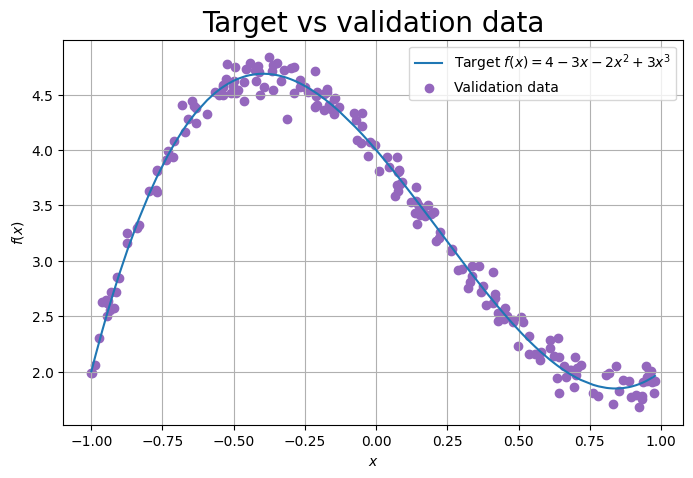

In [31]:
# Function's parameters
a=3 
b=-2
c=-3
d=4

def g(x):
    return a*x**3+b*x**2+c*x+d

# Neural Nerwork parameters
N_v=200       #Number of validation points
N_e=50        #Number of epochs
N_t=2000      #Number of training points  
sigma=0.1     #Standard deviation of noise
 
np.random.seed(0)

x_t=np.random.uniform(-1, 1, N_t)   # Generate training inputs
x_v=np.random.uniform(-1, 1, N_v)   # Generate validation inputs
x_v.sort()
y_t=np.random.normal(g(x_t), sigma) 
y_v=np.random.normal(g(x_v), sigma) 

y_target=g(x_v)                         # Target linear function       

plt.figure(figsize=(8,5))
plt.plot(x_v, y_target, label='Target $f(x)=4-3x-2x^2+3x^3$')
plt.scatter(x_v, y_v, color='tab:purple', label='Validation data')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$f(x)$', fontsize=10)
plt.title('Target vs validation data', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

Per approssimare un polinomio di terzo grado non è più sufficiente un singolo neurone, poiché una rete con un solo nodo realizza esclusivamente trasformazioni lineari. È quindi necessario introdurre almeno un layer nascosto con più neuroni, così da aumentare la capacità rappresentativa del modello e consentire la ricostruzione di andamenti non lineari.

La presenza di una funzione di attivazione non lineare è essenziale per permettere alla rete di modellare termini di ordine superiore. In questo caso si utilizza l’attivazione `tanh`, adatta alla rappresentazione di funzioni lisce. Come ottimizzatore si adotta `adam`, mentre invece come funzione di loss viene scelta anche in questo caso `mse`.

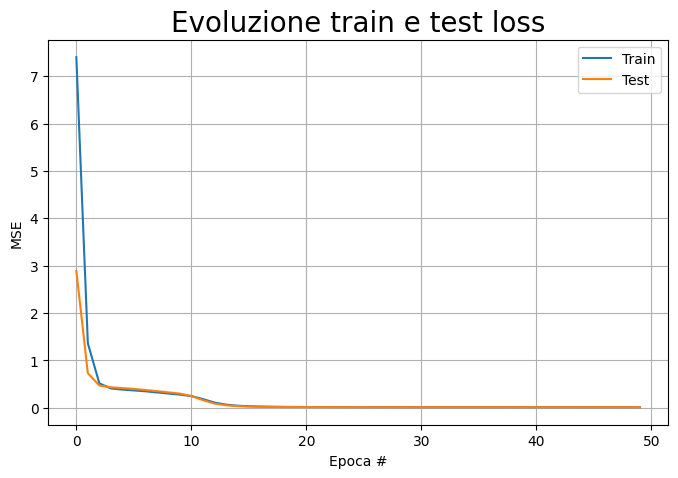

Performance del modello rispetto alla funzione target:
Test loss =  0.0016686682356521487


In [32]:
activation='tanh' 
optimizer='adam'  
loss_function='mse'     

# Compose the NN model
model=Sequential()
# Input x
model.add(Input(shape=(1,)))
# First layer with 32 neurons, each connected to the input
model.add(Dense(32, activation=activation))
# Second layer with 16 neurons, each connected to the 32 outputs of the previous layer
model.add(Dense(16, activation=activation))
# Third layer with 8 neurons, each connected to the 16 outputs of the previous layer
model.add(Dense(8, activation=activation))
# Output layer with 1 neurons, connected to the 8 outputs of the previous layer
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer=optimizer, loss=loss_function, metrics=['mse'])

# Fit the model using training dataset
history=model.fit(x=x_t, y=y_t, 
        batch_size=32, epochs=N_e,
        shuffle=True, verbose=0, 
        validation_data=(x_v, y_v))

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoca #', fontsize=10)
plt.title('Evoluzione train e test loss', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()
# Evaluate model with the exact curve
print('Performance del modello rispetto alla funzione target:')
mse = model.evaluate(x_v, y_target, batch_size=32, verbose=0)
print('Test loss = ', mse[0])

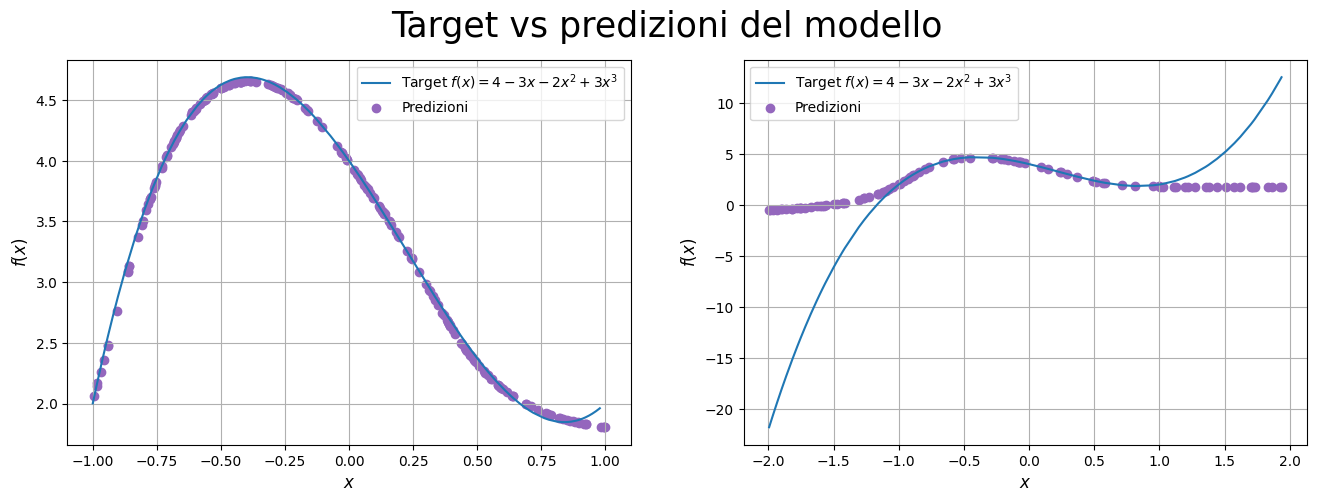

Performance del modello:
Loss test =  0.011971081607043743
Loss target =  0.0016686682356521487


In [33]:
plt.figure(figsize=(16,5))
plt.suptitle('Target vs predizioni del modello', fontsize=25)

x_pred=np.random.uniform(-1, 1, 200)
y_pred=model.predict(x_pred, verbose=0)

plt.subplot(1,2,1)
plt.plot(x_v, g(x_v), label='Target $f(x)=4-3x-2x^2+3x^3$')
plt.scatter(x_pred, y_pred, color='tab:purple', label='Predizioni')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.grid(True)
plt.legend()

x_pred=np.random.uniform(-2, 2, 100)
x_pred.sort()
y_pred=model.predict(x_pred, verbose=0)

plt.subplot(1,2,2)
plt.plot(x_pred, g(x_pred), label='Target $f(x)=4-3x-2x^2+3x^3$')
plt.scatter(x_pred, y_pred, color='tab:purple', label='Predizioni')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Evaluate model
print('Performance del modello:')
mse=model.evaluate(x_v, y_v, batch_size=32, verbose=0)
print('Loss test = ', mse[0])
# Evaluate model with the exact curve
mse=model.evaluate(x_v, y_target, batch_size=32, verbose=0)
print('Loss target = ', mse[0])

Per i valori considerati dei parametri, le predizioni della rete risultano in buon accordo con la funzione target all’interno dell’intervallo di training, con una loss pari a $MSE \approx 0.01$.

Rispetto al caso lineare, è stato necessario aumentare il numero di epoche ($N_{\mathrm{epochs}} = 50$) e la dimensione del training set ($N_{\mathrm{train}} = 2000$); in questo caso infatti la funzione target, essendo più complessa, richiede una capacità rappresentativa superiore e un addestramento più prolungato per raggiungere la convergenza.

Si osserva inoltre che al di fuori del dominio di training le predizioni non seguono più l’andamento della funzione target. Ciò evidenzia che la rete apprende correttamente nell’intervallo visto durante l’addestramento, ma non è in grado di generalizzare in modo affidabile oltre tale dominio.

## <span id="Esercizio11.3" style="color:blue">Esercizio 11.3 - Estensione del modello per fit di funzioni trigonometriche [^](#toc)

### Descrizione

In questo esercizio viene esteso il modello precedente per ottenere un fit del seguente polinomio di terzo grado:

$$
f(x,y)=\sin(x^2+y^2)
$$

nel dominio $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

### Calcolo e risultati

È stata eseguita ancora una volta la medesima analisi, con $N_{\mathrm{valid}}=1000$, $N_{\mathrm{epochs}}=50$, $N_{\mathrm{train}}=8000$ ed infine $\sigma=0.1$.

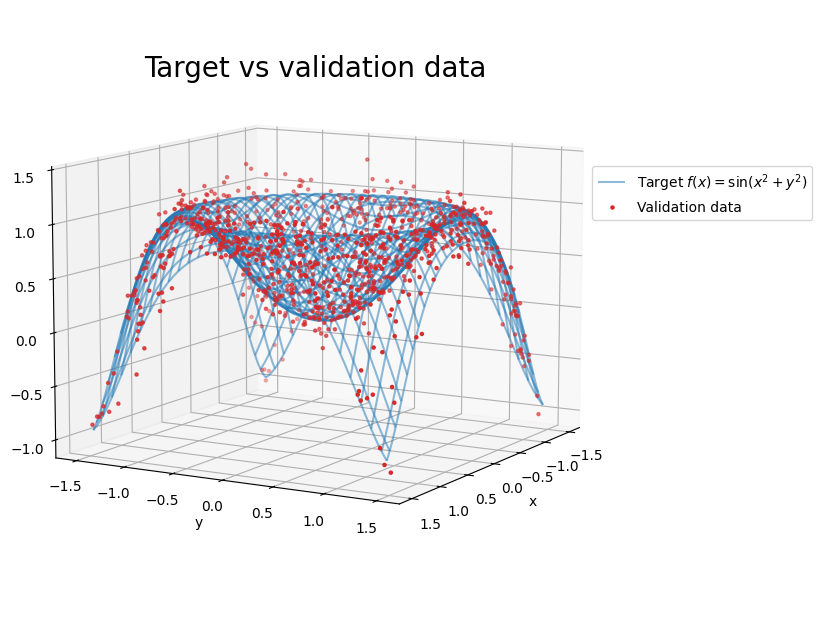

In [36]:
def g(x, y):
    return np.sin((x*x+y*y))

N_v = 1000  #Number of validation points
N_es = 50   #Number of epochs
N_t = 8000  #Number of training points 
sigma = 0.1 #Standard deviation of noise

np.random.seed(0)
l=3./2.
x_t=np.random.uniform(-l, l, N_t)           # Generate training inputs
y_t=np.random.uniform(-l, l, N_t) 
xy_t=np.column_stack((x_t, y_t))
x_v=np.random.uniform(-l, l, N_v)           # Generate validation inputs
y_v=np.random.uniform(-l, l, N_v)
xy_v=np.column_stack((x_v, y_v))

z_t=np.random.normal(g(x_t,y_t), sigma)    
z_v=np.random.normal(g(x_v,y_v), sigma) 
z_target=g(x_v, y_v)                        # Target linear function        

fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig)
fig.add_axes(ax)
x_grid=np.arange(-l,l, 0.05)
y_grid=np.arange(-l,l, 0.05)
X_grid, Y_grid = np.meshgrid(x_grid,y_grid)
ax.plot_wireframe(X_grid, Y_grid, g(X_grid,Y_grid), alpha = 0.5, label='Target $f(x)=\sin(x^2+y^2)$')
ax.scatter(x_v, y_v, z_v, marker = '.', color = 'tab:red', label='Validation data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Target vs validation data', fontsize=20, y=0.95)
ax.view_init(10, 30)
ax.legend(bbox_to_anchor=(0.95, 0.75))
plt.show()

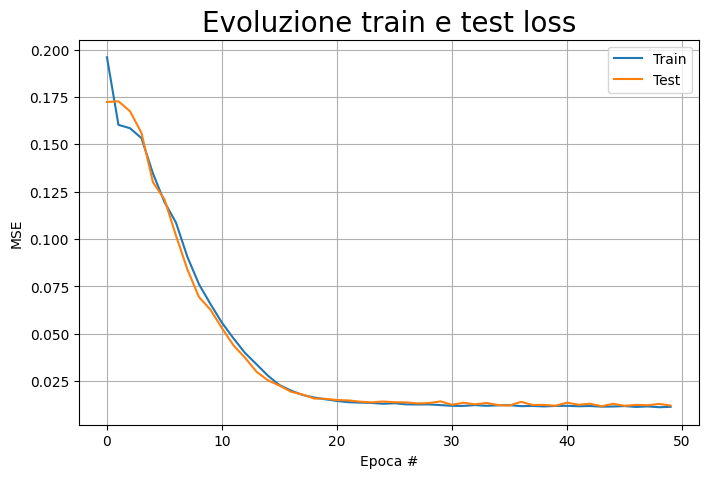

Performance del modello:
Test loss= 0.012132646515965462

Performance del modello con la curva esatta:
Test loss= 0.0016128529096022248


In [40]:
activation='tanh' 
optimizer='adam'   
loss_function='mse'     

# Compose the NN model
model=Sequential()
# Input x
model.add(Input(shape=(2,)))
# First layer with 32 neurons, each connected to the input
model.add(Dense(32, activation=activation))
# Second layer with 16 neurons, each connected to the 32 outputs of the previous layer
model.add(Dense(16, activation=activation))
# Third layer with 8 neurons, each connected to the 16 outputs of the previous layer
model.add(Dense(8, activation=activation))
# Output layer with 1 neurons, connected to the 8 outputs of the previous layer
model.add(Dense(1))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer=optimizer, loss=loss_function, metrics=['mse'])

# Fit the model using training dataset
history=model.fit(x=xy_t, y=z_t, 
        batch_size=32, epochs=N_e,
        shuffle=True, verbose=0, 
        validation_data=(xy_v, z_v))

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.ylabel('MSE', fontsize=10)
plt.xlabel('Epoca #', fontsize=10)
plt.title('Evoluzione train e test loss', fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

print('Performance del modello:')
# Evaluate model
mse=model.evaluate(xy_v, z_v, batch_size=32, verbose=0)
print('Test loss=', mse[0])
print()
# Evaluate model with the exact curve
print('Performance del modello con la curva esatta:')
mse=model.evaluate(xy_v, z_target, batch_size=32, verbose=0)
print('Test loss=', mse[0])

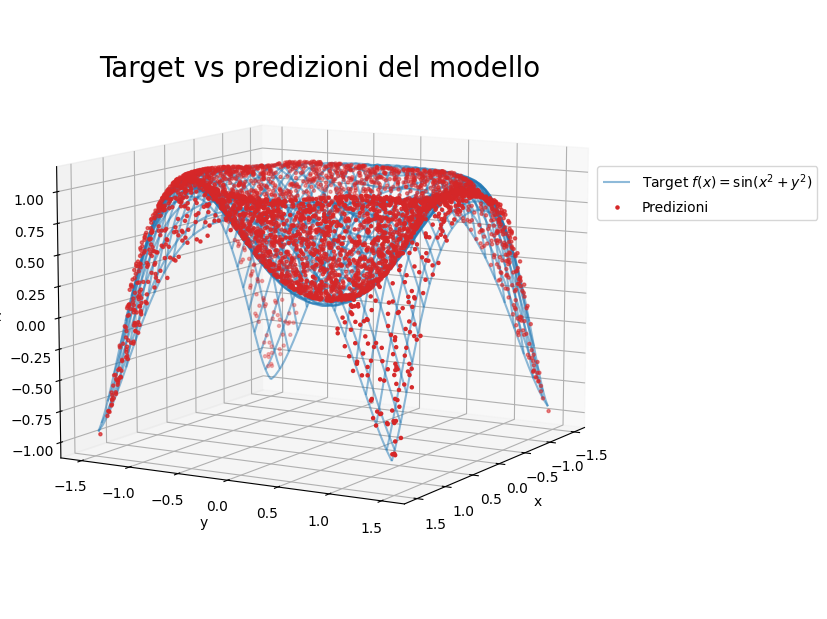

In [41]:
fig=plt.figure(figsize = (6,6))
ax=Axes3D(fig)
fig.add_axes(ax)

x_pred=np.random.uniform(-l, l, 4000)           
y_pred=np.random.uniform(-l, l, 4000)
xy_pred=np.column_stack((x_pred, y_pred))
z_pred=model.predict(xy_pred, verbose=0).ravel()  

x_grid=np.arange(-l,l, 0.05)
y_grid=np.arange(-l,l, 0.05)
X_grid, Y_grid=np.meshgrid(x_grid,y_grid)
ax.plot_wireframe(X_grid, Y_grid, g(X_grid,Y_grid), alpha=0.5, label='Target $f(x)=\sin(x^2+y^2)$')
ax.scatter(x_pred, y_pred, z_pred, marker='.', color='tab:red', label='Predizioni')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Target vs predizioni del modello', fontsize=20, y=0.95)
ax.view_init(10, 30)
ax.legend(bbox_to_anchor=(0.95, 0.75))

plt.show()

- Sono stati ancora utilizzati la funzione di attivazione `tanh` e l'ottimizzatore `adam`.
- Si ha un buon accordo tra le predizioni della NN e la funzione target, con una loss pari a $MSE \approx 0.01$. La rete è dunque in grado di apprendere correttamente l’andamento bidimensionale proposto.
- È stato necessario aumentare in modo significativo il numero di dati di training fino a $N_{\mathrm{train}}=8000$. Ciò trova riscontro nel fatto che per rappresentare adeguatamente la superficie serve un numero maggiore di punti (lo spazio da campionare è bidimensionale, più ampio).